# Data Science Project

* Name: Robert Cauvy
* Email: rcauvy@gmail.com


## TABLE OF CONTENTS 


- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
___

# Business Problem

As the Covid-19 virus has spread throughout the world. Countries across the world are working to innoculate their populations and protect against future outbreaks it is essential to know which populations are at risk of not receiving the vaccines. This information would help public health organizations optimally target their resources to informing and educating individuals about the immunizations.

# OBTAIN

We will be using a dataset from Data Driven competition (drivendata.org/competitions/66/flu-shot-learning/data/) that contains approximately 26,707 survey responses relating to the H1N1 and seasonal flu to train various machine learning algorithms in order to predict how likely an individual is to receive a vaccine.

## Imports

In [213]:
## Data Handling
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

## Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Settings
from IPython.display import display
%matplotlib inline
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
pd.set_option('max_rows', 100)

## Scikit-Learn
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics 


from sklearn import set_config
set_config(display='diagram')

import missingno

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, plot_confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [62]:
# Data Source
# https://www.drivendata.org/competitions/66/flu-shot-learning/data/

In [310]:
## Reading csv data and loading into a DataFrame

features_df = pd.read_csv('data/training_set_features.csv',index_col=0)
features_df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,1.00,2.00,2.00,1.00,2.00,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.00,0.00,NaN,NaN
1,3.00,2.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,5.00,4.00,4.00,4.00,2.00,4.00,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.00,0.00,pxcmvdjn,xgwztkwe
2,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,nan,nan,1.00,0.00,0.00,nan,3.00,1.00,1.00,4.00,1.00,2.00,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.00,0.00,rucpziij,xtkaffoo
3,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,nan,3.00,3.00,5.00,5.00,4.00,1.00,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.00,0.00,NaN,NaN
4,2.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,nan,3.00,3.00,2.00,3.00,1.00,4.00,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.00,0.00,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,3.00,1.00,1.00,5.00,2.00,2.00,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.00,0.00,NaN,NaN
26703,1.00,2.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,4.00,2.00,2.00,5.00,1.00,1.00,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.00,0.00,fcxhlnwr,cmhcxjea
26704,2.00,2.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,nan,4.00,4.00,2.00,5.00,4.00,2.00,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.00,0.00,NaN,NaN


In [311]:
# Dropping Features Specific to H1N1
seas_feats_df =features_df.drop(columns=['h1n1_concern','h1n1_knowledge','doctor_recc_h1n1',
                 'opinion_h1n1_vacc_effective','opinion_h1n1_risk',
                 'opinion_h1n1_sick_from_vacc'],axis=1)

In [322]:
labels_df = pd.read_csv('data/training_set_labels.csv',index_col=0)
seas_labels_df = labels_df.drop('h1n1_vaccine',axis=1)
seas_labels_df

,seasonal_vaccine
respondent_id,
0,0
1,1
2,0
3,1
4,0
...,...
26702,0
26703,0
26704,1


In [324]:
# Joining Features and Labels Dataframes
joined_df = seas_feats_df.join(seas_labels_df)
joined_df

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,2.00,1.00,2.00,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.00,0.00,NaN,NaN,0
1,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,4.00,2.00,4.00,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.00,0.00,pxcmvdjn,xgwztkwe,1
2,0.00,1.00,0.00,0.00,0.00,0.00,0.00,nan,1.00,0.00,0.00,nan,4.00,1.00,2.00,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.00,0.00,rucpziij,xtkaffoo,0
3,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,nan,5.00,4.00,1.00,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.00,0.00,NaN,NaN,1
4,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,nan,3.00,1.00,4.00,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.00,0.00,wxleyezf,emcorrxb,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,nan,5.00,2.00,2.00,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.00,0.00,NaN,NaN,0
26703,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,5.00,1.00,1.00,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.00,0.00,fcxhlnwr,cmhcxjea,0
26704,0.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,nan,5.00,4.00,2.00,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.00,0.00,NaN,NaN,1


In [271]:
# Confirming features and the labels rows match up. 
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

The assertion ran without an error, indicating the features and labels line up correctly.

The raw dataset contains 29 features, 1 target, and 26,707 instances.

### Data Glossary

**behavioral_antiviral_meds** - Has taken antiviral medications. (binary)

**behavioral_avoidance** - Has avoided close contact with others with flu-like symptoms. (binary)

**behavioral_face_mask** - Has bought a face mask. (binary)

**behavioral_wash_hands** - Has frequently washed hands or used hand sanitizer. (binary)

**behavioral_large_gatherings** - Has reduced time at large gatherings. (binary)

**behavioral_outside_home** - Has reduced contact with people outside of own household. (binary)

**behavioral_touch_face** - Has avoided touching eyes, nose, or mouth. (binary)

**doctor_recc_h1n1** - H1N1 flu vaccine was recommended by doctor. (binary)

**doctor_recc_seasonal** - Seasonal flu vaccine was recommended by doctor. (binary)

**chronic_med_condition** - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)

**child_under_6_months** - Has regular close contact with a child under the age of six months. (binary)

**health_worker** - Is a healthcare worker. (binary)

**health_insurance** - Has health insurance. (binary)

**opinion_seas_vacc_effective** - Respondent's opinion about seasonal flu vaccine effectiveness.\
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

**opinion_seas_risk** - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.\
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

**opinion_seas_sick_from_vacc** - Respondent's worry of getting sick from taking seasonal flu vaccine.\
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

**age_group** - Age group of respondent.

**education** - Self-reported education level.

**race** - Race of respondent.

**sex** - Sex of respondent.

**income_poverty** - Household annual income of respondent with respect to 2008 Census poverty thresholds.

**marital_status** - Marital status of respondent.

**rent_or_own** - Housing situation of respondent.

**employment_status** - Employment status of respondent.

**hhs_geo_region** - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.

**census_msa** - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.

**household_adults** - Number of other adults in household, top-coded to 3.

**household_children** - Number of children in household, top-coded to 3.

**employment_industry** - Type of industry respondent is employed in. Values are represented as short random character strings.

**employment_occupation** - Type of occupation of respondent. Values are represented as short random character strings.

In [325]:
seas_feats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    26636 non-null  float64
 1   behavioral_avoidance         26499 non-null  float64
 2   behavioral_face_mask         26688 non-null  float64
 3   behavioral_wash_hands        26665 non-null  float64
 4   behavioral_large_gatherings  26620 non-null  float64
 5   behavioral_outside_home      26625 non-null  float64
 6   behavioral_touch_face        26579 non-null  float64
 7   doctor_recc_seasonal         24547 non-null  float64
 8   chronic_med_condition        25736 non-null  float64
 9   child_under_6_months         25887 non-null  float64
 10  health_worker                25903 non-null  float64
 11  health_insurance             14433 non-null  float64
 12  opinion_seas_vacc_effective  26245 non-null  float64
 13  opinion_seas_ris

Most of the data fields are stored as floats. Confirming with the data glossary, some fields are actually binary or ordinal categories. The other data fields are stored as objects but most are also able to be encoded into ordinal and  nominal categorical variables.

In [326]:
print(seas_labels_df['seasonal_vaccine'].value_counts(dropna=False))

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64


Looks like there are target responses for every record in the dataset which is great. We won't have to drop any rows. See target proportions visualized below.

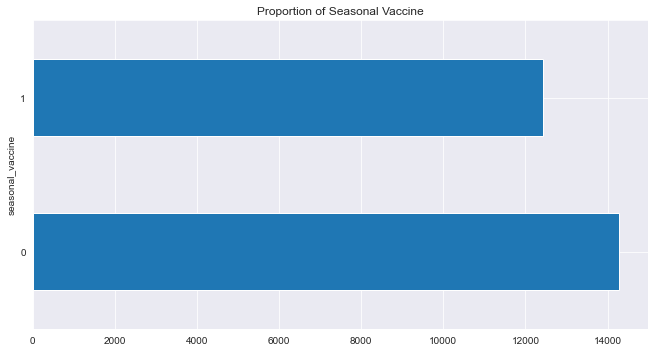

In [290]:
fig, ax = plt.subplots(figsize=(9.2, 5))

n_obs = labels_df.shape



(labels_df['seasonal_vaccine']
    .value_counts()
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax)
)
ax.set_ylabel("seasonal_vaccine")

fig.tight_layout()

# SCRUB

Often times with survey collected data, there are some going to be missing responses. In order to process the data, each field will need to be evaluated to determine how missing values should be treated.

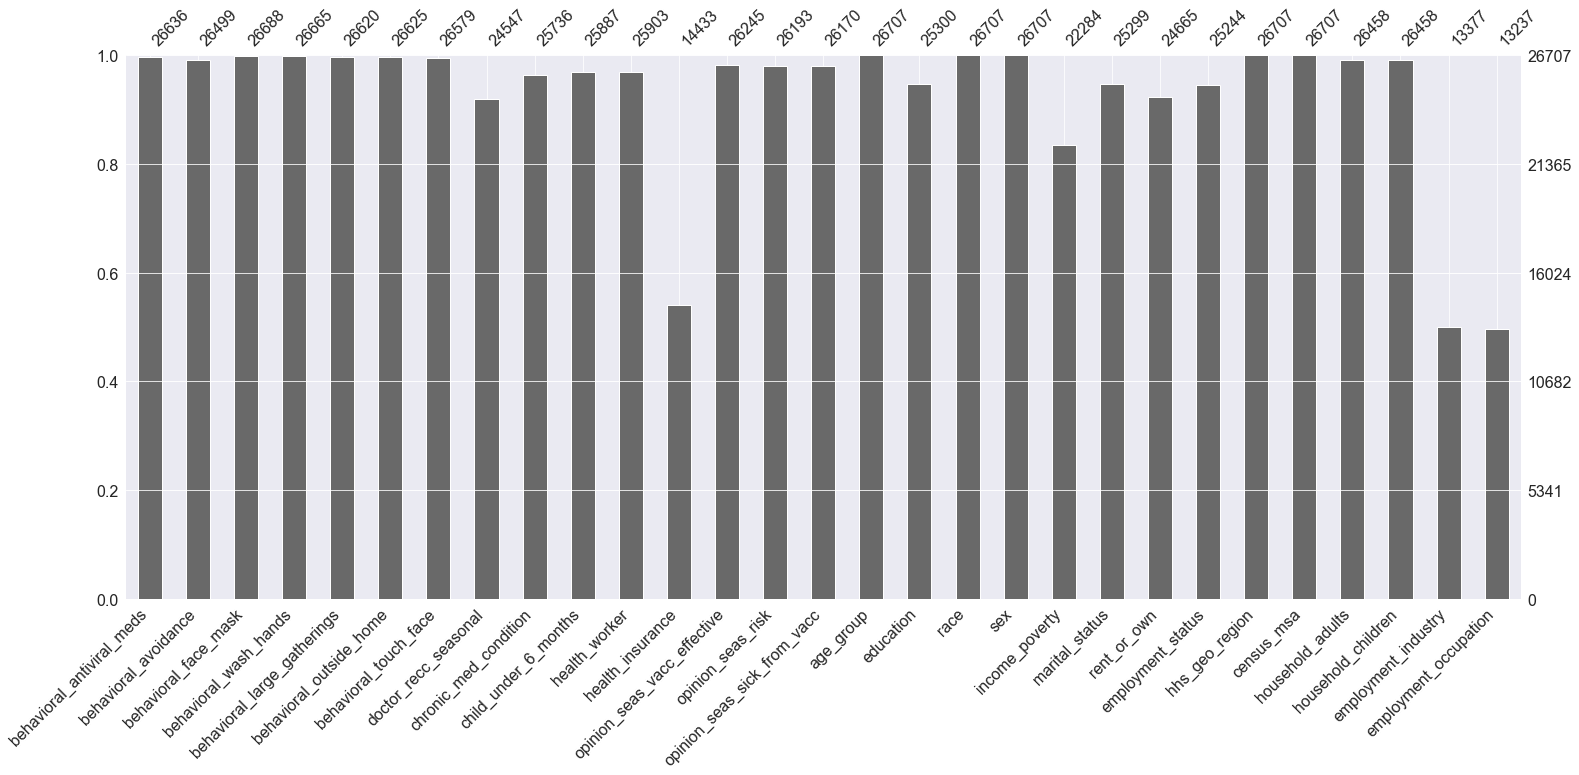

In [291]:
missingno.bar(seas_feats_df);

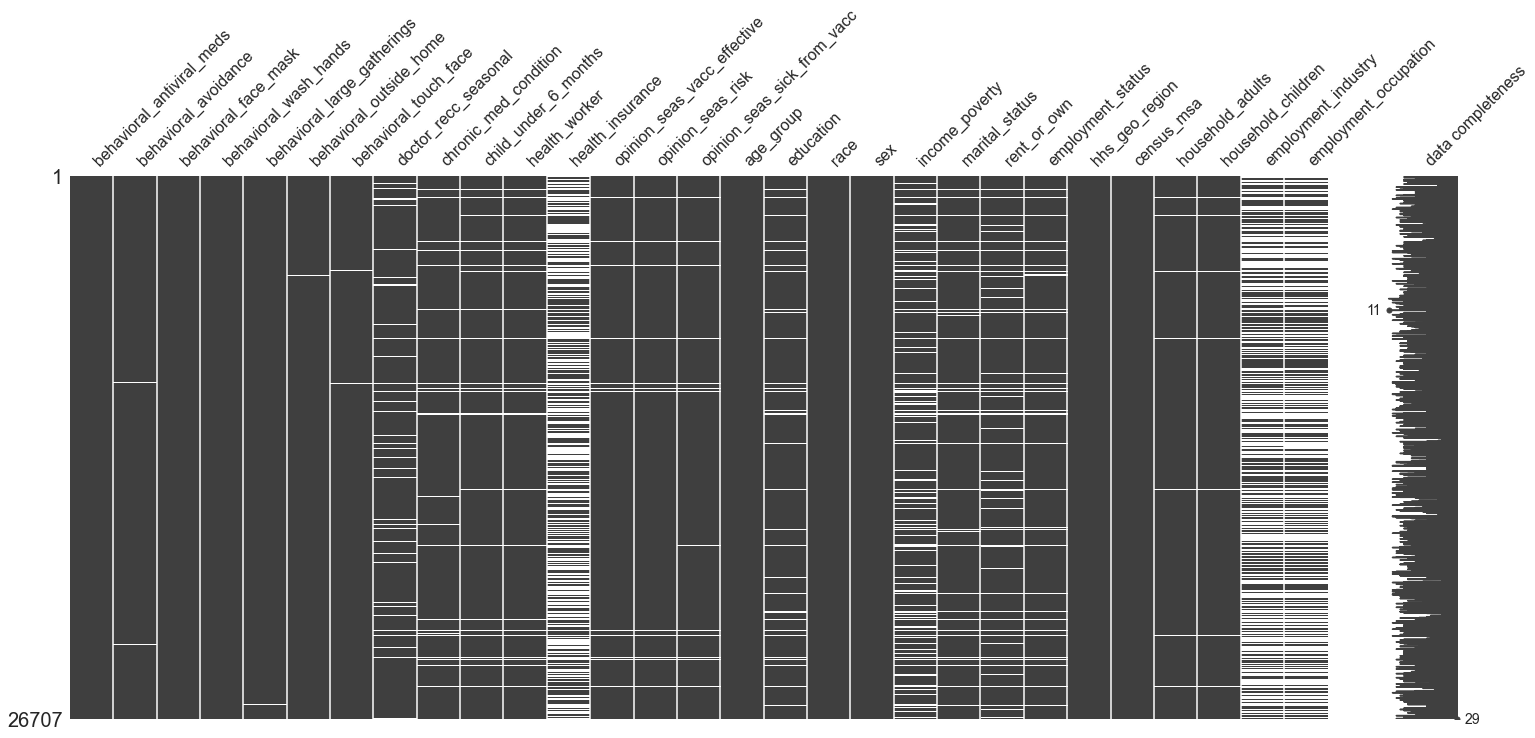

In [292]:
missingno.matrix(seas_feats_df, labels=True);

After inspecting the visualization, it is evident that the features missing the most responses are health insurance and employment details. Since these are categorical variables, we can create a new category and impute for the missing values. 

Instead of performing any manual updates to the remaining values, I will test different imputation methods as part of my modeling pipeline. </br></br> Potential methods would include:

Imputing the string "MISSING"
Imputing the most frequent value for string values
Using the mean, median, or mode for numeric datatypes
The benefit of including this step in a pipeline is that I will be able to include these different methods in a GridSearchCV as part of my hyperparameter turning steps.

In [294]:
for col in list(seas_feats_df.columns):
    print(seas_feats_df[col].value_counts(dropna=False))

0.00    25335
1.00     1301
nan        71
Name: behavioral_antiviral_meds, dtype: int64
1.00    19228
0.00     7271
nan       208
Name: behavioral_avoidance, dtype: int64
0.00    24847
1.00     1841
nan        19
Name: behavioral_face_mask, dtype: int64
1.00    22015
0.00     4650
nan        42
Name: behavioral_wash_hands, dtype: int64
0.00    17073
1.00     9547
nan        87
Name: behavioral_large_gatherings, dtype: int64
0.00    17644
1.00     8981
nan        82
Name: behavioral_outside_home, dtype: int64
1.00    18001
0.00     8578
nan       128
Name: behavioral_touch_face, dtype: int64
0.00    16453
1.00     8094
nan      2160
Name: doctor_recc_seasonal, dtype: int64
0.00    18446
1.00     7290
nan       971
Name: chronic_med_condition, dtype: int64
0.00    23749
1.00     2138
nan       820
Name: child_under_6_months, dtype: int64
0.00    23004
1.00     2899
nan       804
Name: health_worker, dtype: int64
1.00    12697
nan     12274
0.00     1736
Name: health_insurance, dtype: int

# EXPLORE

In [304]:
# Creating a function to display relationships between feature variabls and targets.

def vaxx_rates(feature, target, df, ax=None):
    
    """Stacked bar chart of vaccination rate for `target` against 
    `feature`. 
    
    Args:
        feaure (string): column name of feature variable
        target (string): column name of target variable
        df (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (joined_df[[target, feature]]
                  .groupby([target, feature])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis=1)
    props = counts.div(group_counts, axis=0)

    props.plot(kind="barh", stacked=True, ax=ax)

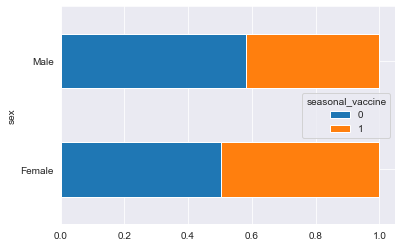

In [305]:
vaxx_rates('sex','seasonal_vaccine', joined_df)

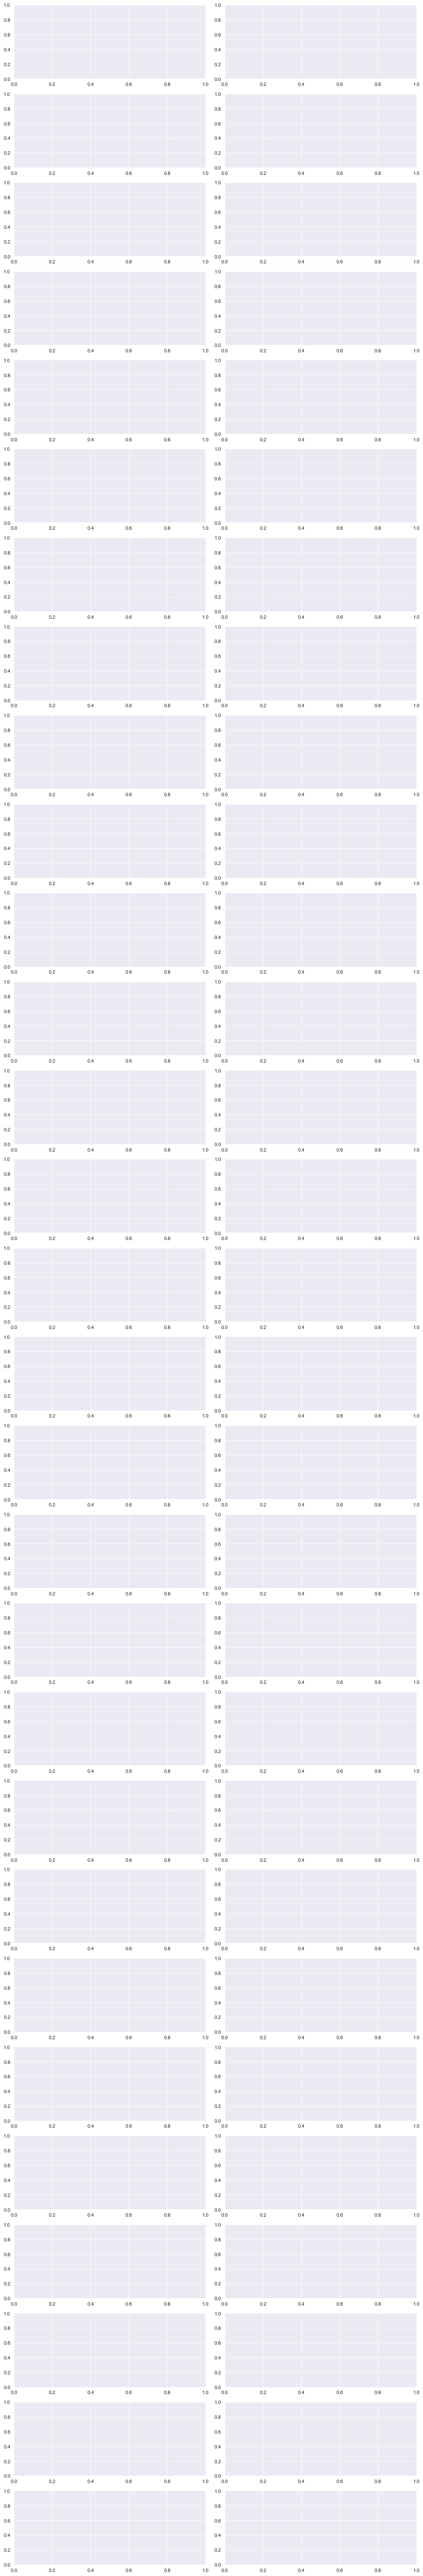

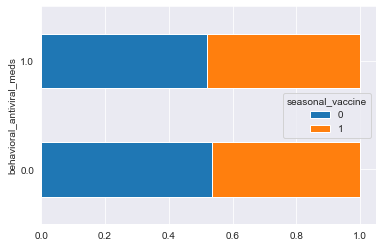

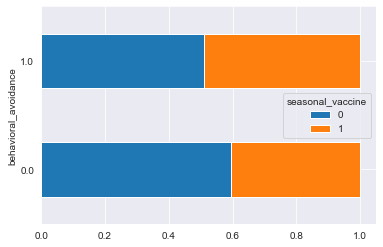

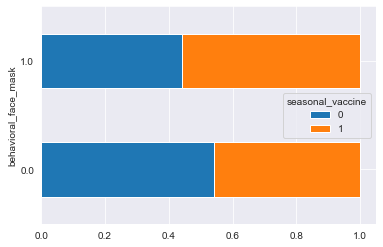

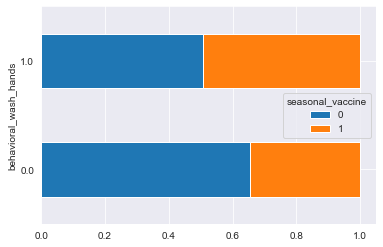

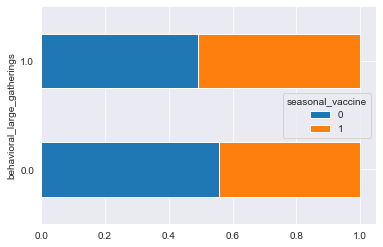

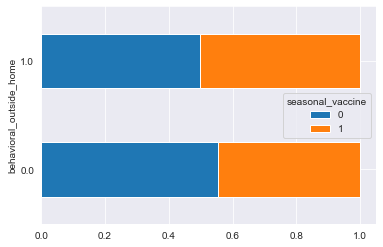

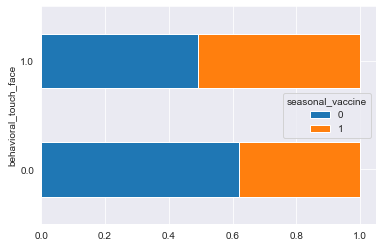

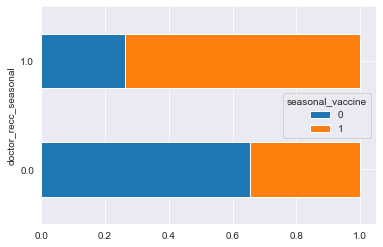

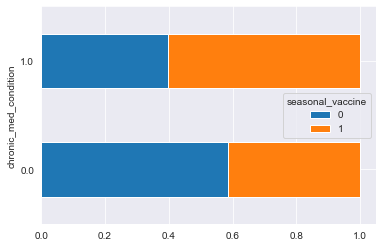

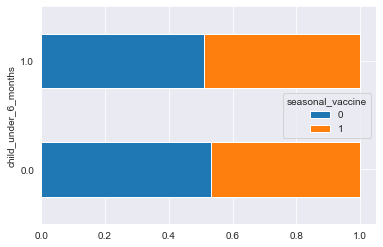

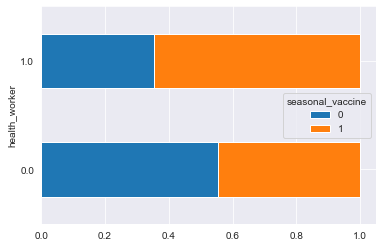

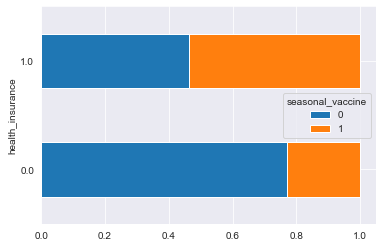

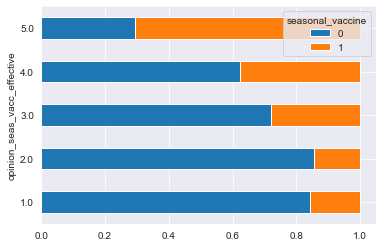

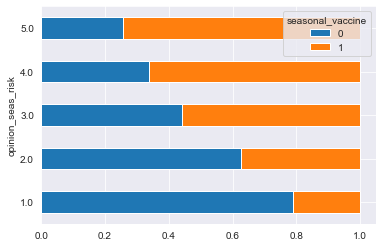

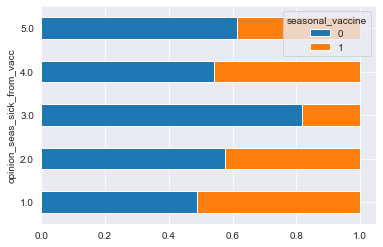

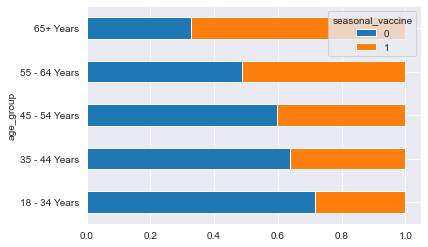

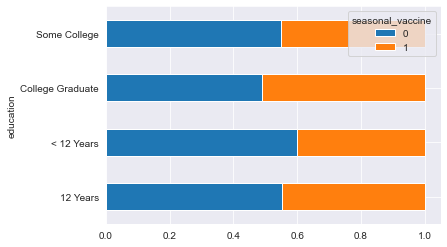

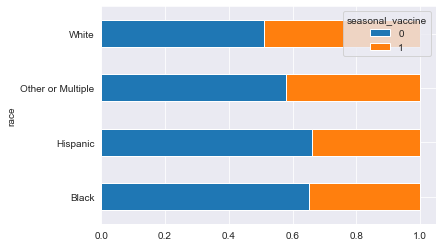

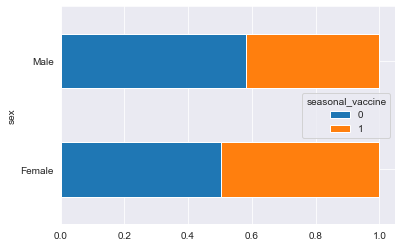

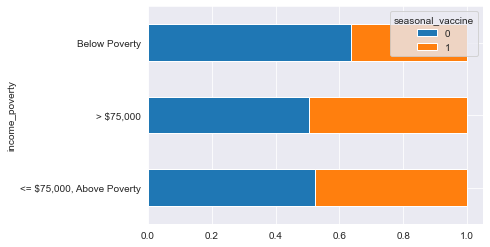

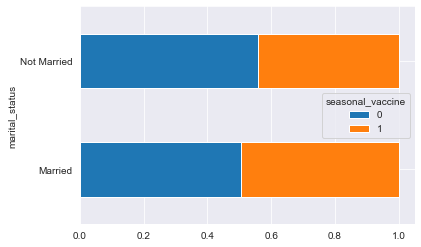

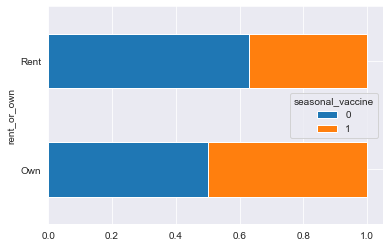

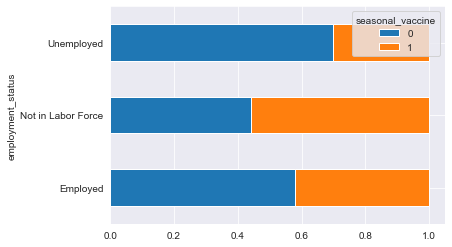

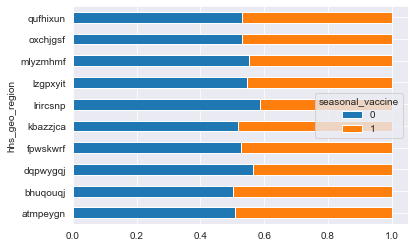

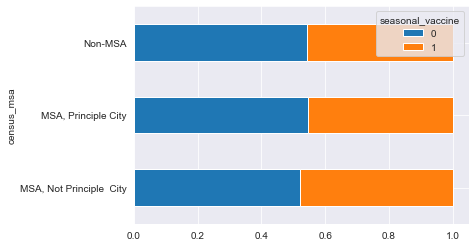

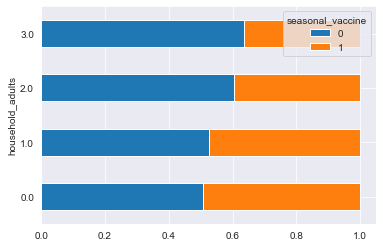

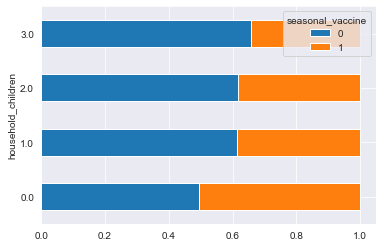

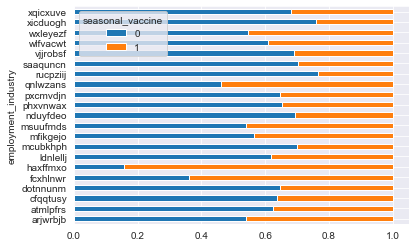

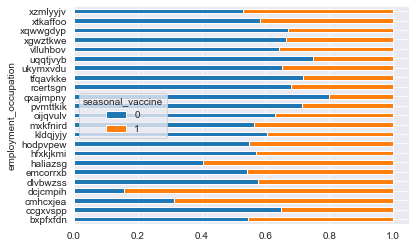

In [308]:
# Create a loop to plot each feature column in relations to seasonal_vaccine targets.

cols_to_plot = list(seas_feats_df.columns)

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(12,len(cols_to_plot)*2.5)
)
for col in cols_to_plot:
   
    vaxx_rates(col, 'seasonal_vaccine', joined_df)


fig.tight_layout();

# MODEL

## Preprocessing

### Perform Train-Test-Split

In [328]:
X_train, X_test, y_train, y_test = train_test_split(
    seas_feats_df, seas_labels_df, test_size =.25, random_state=42)
X_train.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25194,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,0.00,0.00,0.00,nan,4.00,2.00,2.00,18 - 34 Years,12 Years,White,Female,NaN,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,1.00,1.00,NaN,NaN
14006,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,4.00,5.00,4.00,45 - 54 Years,Some College,White,Female,NaN,Married,NaN,Employed,lzgpxyit,"MSA, Not Principle City",2.00,1.00,fcxhlnwr,oijqvulv
11285,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,4.00,2.00,1.00,45 - 54 Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,kbazzjca,"MSA, Principle City",0.00,1.00,wlfvacwt,hfxkjkmi
2900,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,4.00,4.00,2.00,55 - 64 Years,College Graduate,White,Male,Below Poverty,Not Married,Own,Employed,mlyzmhmf,"MSA, Not Principle City",0.00,0.00,mcubkhph,ukymxvdu
19083,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,nan,nan,nan,nan,1.00,2.00,4.00,18 - 34 Years,NaN,White,Female,NaN,NaN,NaN,NaN,bhuqouqj,"MSA, Not Principle City",nan,nan,NaN,NaN


In [330]:
y_train['seasonal_vaccine'].value_counts()

0    10638
1     9392
Name: seasonal_vaccine, dtype: int64

In [331]:
y_test['seasonal_vaccine'].value_counts()

0    3634
1    3043
Name: seasonal_vaccine, dtype: int64

### Impute Missing Values, Scaling and Encoding Pipelines

In [339]:
# Copying the train test split
X_train_tf = X_train.copy()
X_test_tf = X_test.copy()

In [341]:
# Breaking out numerical and categorical columns to determine which 
# columns need to be sclaed and which need to be encoded.
#  make cat_cols and num_cols
cat_cols = X_train_tf.select_dtypes('O').columns.tolist()
num_cols = X_train_tf.select_dtypes('number').columns.tolist()
num_cols,cat_cols

(['behavioral_antiviral_meds',
  'behavioral_avoidance',
  'behavioral_face_mask',
  'behavioral_wash_hands',
  'behavioral_large_gatherings',
  'behavioral_outside_home',
  'behavioral_touch_face',
  'doctor_recc_seasonal',
  'chronic_med_condition',
  'child_under_6_months',
  'health_worker',
  'health_insurance',
  'opinion_seas_vacc_effective',
  'opinion_seas_risk',
  'opinion_seas_sick_from_vacc',
  'household_adults',
  'household_children'],
 ['age_group',
  'education',
  'race',
  'sex',
  'income_poverty',
  'marital_status',
  'rent_or_own',
  'employment_status',
  'hhs_geo_region',
  'census_msa',
  'employment_industry',
  'employment_occupation'])

#### Numerical Columns

In [344]:
# Create a transformer pipeline that will impute missing values using the 
# median and then standardize all numerical columns

num_tf = Pipeline(steps=[
    ('SI',SimpleImputer(strategy='median')),
    ('SS',StandardScaler())])

In [345]:
X_train_num_tf = num_tf.fit_transform(X_train[num_cols])
X_test_num_tf = num_tf.transform(X_test[num_cols])
X_train_num_tf

array([[-0.22644649, -1.62924603, -0.27402537, ..., -0.08933262,
         0.15110623,  0.50597212],
       [-0.22644649,  0.61378084, -0.27402537, ...,  1.42512566,
         1.48974303,  0.50597212],
       [-0.22644649, -1.62924603, -0.27402537, ..., -0.84656177,
        -1.18753056,  0.50597212],
       ...,
       [-0.22644649,  0.61378084, -0.27402537, ..., -0.08933262,
         0.15110623, -0.57309747],
       [-0.22644649,  0.61378084, -0.27402537, ...,  1.42512566,
         0.15110623, -0.57309747],
       [-0.22644649, -1.62924603, -0.27402537, ..., -0.08933262,
        -1.18753056, -0.57309747]])

#### Categorical Columns

In [366]:
# Create a transformer pipeline that will impute missing values using a 
# constance placeholder 'Unknown' and then OneHotEncode all numerical columns

cat_tf = Pipeline(steps=[
    ('SI',SimpleImputer(strategy='constant',fill_value='Unknown')),
    ('OHE',OneHotEncoder(sparse=False,drop='first'))])

In [367]:
X_train_cat_tf =cat_tf.fit_transform(X_train[cat_cols])
X_test_cat_tf =cat_tf.transform(X_test[cat_cols])

X_train_cat_tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Combining together with ColumnTransformer

In [357]:
# Join both numerical and categorical Pipelines using ColumnTransformer
preprocessing = ColumnTransformer(transformers=[
    ('Num',num_tf,num_cols),
    ('Cat',cat_tf,cat_cols)])
preprocessing

ColumnTransformer(transformers=[('Num',
                                 Pipeline(steps=[('SI',
                                                  SimpleImputer(strategy='median')),
                                                 ('SS', StandardScaler())]),
                                 ['behavioral_antiviral_meds',
                                  'behavioral_avoidance',
                                  'behavioral_face_mask',
                                  'behavioral_wash_hands',
                                  'behavioral_large_gatherings',
                                  'behavioral_outside_home',
                                  'behavioral_touch_face',
                                  'doctor_recc_seasonal',
                                  'chronic_med_condition',
                                  'ch...
                                  'household_adults', 'household_children']),
                                ('Cat',
                                 Pipeline(steps=[('SI',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('OHE',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['age_group', 'education', 'race', 'sex',
                                  'income_poverty', 'marital_status',
                                  'rent_or_own', 'employment_status',
                                  'hhs_geo_region', 'census_msa',
                                  'employment_industry',
                                  'employment_occupation'])])

In [358]:
## Get X_train and X_test from column transformer
X_train_tf = preprocessing.fit_transform(X_train)
X_test_tf = preprocessing.transform(X_test)

In [360]:
X_test_tf

array([[-0.22644649,  0.61378084,  3.64929713, ...,  0.        ,
         0.        ,  0.        ],
       [-0.22644649,  0.61378084,  3.64929713, ...,  0.        ,
         0.        ,  0.        ],
       [-0.22644649,  0.61378084, -0.27402537, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.22644649,  0.61378084, -0.27402537, ...,  0.        ,
         1.        ,  0.        ],
       [-0.22644649, -1.62924603, -0.27402537, ...,  0.        ,
         0.        ,  0.        ],
       [-0.22644649,  0.61378084, -0.27402537, ...,  0.        ,
         0.        ,  0.        ]])

In [171]:
train_cat_cols = pd.DataFrame(train_cat_cols,
                              columns=encoder.get_feature_names(cat_cols))
test_cat_cols =  pd.DataFrame(test_cat_cols,
                              columns=encoder.get_feature_names(cat_cols))
test_cat_cols

,education_< 12 Years,education_College Graduate,education_Some College,education_Unknown,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"income_poverty_> $75,000",income_poverty_Below Poverty,income_poverty_Unknown,marital_status_Not Married,marital_status_Unknown,rent_or_own_Rent,rent_or_own_Unknown,employment_status_Not in Labor Force,employment_status_Unemployed,employment_status_Unknown,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA,employment_industry_arjwrbjb,employment_industry_atmlpfrs,employment_industry_cfqqtusy,employment_industry_dotnnunm,employment_industry_fcxhlnwr,employment_industry_haxffmxo,employment_industry_ldnlellj,employment_industry_mcubkhph,employment_industry_mfikgejo,employment_industry_msuufmds,employment_industry_nduyfdeo,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,employment_occupation_bxpfxfdn,employment_occupation_ccgxvspp,employment_occupation_cmhcxjea,employment_occupation_dcjcmpih,employment_occupation_dlvbwzss,employment_occupation_emcorrxb,employment_occupation_haliazsg,employment_occupation_hfxkjkmi,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0

In [172]:
# Scaling Numerical Columns
scaler = StandardScaler()
train_num_cols = pd.DataFrame(scaler.fit_transform(X_train_tf[num_cols]),
                              columns=num_cols)
test_num_cols =  pd.DataFrame(scaler.transform(X_test_tf[num_cols]),
                              columns=num_cols)
train_num_cols

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,h1n1_concern,h1n1_knowledge,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,4.38,0.61,-0.27,0.46,-0.74,-0.71,0.69,-0.51,-0.66,-0.61,-0.29,2.86,0.26,0.42,-0.42,-0.86,0.52,1.22,-0.02,0.95,-0.85,-1.18,0.51
1,-0.23,0.61,-0.27,0.46,1.35,1.42,-1.45,-0.51,-0.66,1.64,-0.29,-0.35,0.26,1.52,-2.04,1.15,-1.04,1.22,-1.88,-1.24,-0.09,0.16,-0.57
2,-0.23,0.61,-0.27,0.46,-0.74,-0.71,-1.45,-0.51,-0.66,-0.61,-0.29,-0.35,0.26,-0.68,1.20,0.15,-0.26,-0.26,0.91,-0.51,-0.85,-1.18,-0.57
3,-0.23,0.61,-0.27,-2.18,-0.74,-0.71,-1.45,-0.51,-0.66,-0.61,-0.29,-0.35,0.26,0.42,-0.42,0.15,-0.26,1.22,-0.02,-0.51,-0.09,0.16,2.67
4,-0.23,0.61,-0.27,0.46,-0.74,-0.71,-1.45,1.98,-0.66,1.64,-0.29,-0.35,0.26,1.52,1.20,1.15,1.30,-0.26,0.91,1.67,-0.85,1.49,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20025,-0.23,0.61,-0.27,0.46,-0.74,-0.71,-1.45,-0.51,1.51,1.64,3.42,-0.35,0.26,0.42,-0.42,1.15,-0.26,-1.00,0.91,1.67,-0.09,0.16,-0.57
20026,-0.23,0.61,-0.27,0.46,-0.74,-0.71,0.69,-0.51,1.51,-0.61,-0.29,-0.35,0.26,0.42,-0.42,0.15,-1.04,-1.00,-0.02,-1.24,-0.85,-1.18,-0.57
20027,-0.23,0.61,-0.27,0.46,-0.74,-0.71,0.69,-0.51,1.51,-0.61,-0.29,-0.35,0.26,-0.68,-0.42,1.15,-0.26,-0.26,0.91,0.95,1.43,0.16,-0.57
20028,-0.23,0.61,-0.27,0.46,1.35,-0.71,0.69,-0.51,-0.66,-0.61,-0.29,-0.35,0.26,0.42,-2.04,1.15,1.30,-0.26,0.91,1.67,2.19,-1.18,-0.57


In [173]:
## Joining numerical and categorical dataframes 
X_train_tf = pd.concat([train_num_cols,train_cat_cols],axis=1)
X_test_tf = pd.concat([test_num_cols,test_cat_cols],axis=1)
X_test_tf

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,h1n1_concern,h1n1_knowledge,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,education_< 12 Years,education_College Graduate,education_Some College,education_Unknown,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"income_poverty_> $75,000",income_poverty_Below Poverty,income_poverty_Unknown,marital_status_Not Married,marital_status_Unknown,rent_or_own_Rent,rent_or_own_Unknown,employment_status_Not in Labor Force,employment_status_Unemployed,employment_status_Unknown,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA,employment_industry_arjwrbjb,employment_industry_atmlpfrs,employment_industry_cfqqtusy,employment_industry_dotnnunm,employment_industry_fcxhlnwr,employment_industry_haxffmxo,employment_industry_ldnlellj,employment_industry_mcubkhph,employment_industry_mfikgejo,employment_industry_msuufmds,employment_industry_nduyfdeo,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,employment_occupation_bxpfxfdn,employment_occupation_ccgxvspp,employment_occupation_cmhcxjea,employment_occupation_dcjcmpih,employment_occupation_dlvbwzss,employment_occupation_emcorrxb,employment_occupation_haliazsg,employment_occupation_hfxkjkmi,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,-0.23,0.61,-0.27,0.46,-0.74,-0.71,0.69,-0.51,-0.66,1.64,-0.29,-0.35,0.26,1.52,1.20,0.15,1.30,-1.00,0.91,0.95,-0.85,0.16,0.51,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,-0.23,0.61,-0.27,0.46,1.35,1.42,0.69,-0.51,-0.66,-0.61,-0.29,-0.35,0.26,0.42,-0.42,0.15,-0.26,1.22,-0.02,-0.51,1.43,-1.18,-0.57,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,-0.23,0.61,-0.27,-2.18,-0.74,-0.71,0.69,-0.51,-0.66,-0.61,-0.29,-0.35,0.26,-0.68,1.20,0.15,1.30,-0.26,0.91,1.67,1.43,-1.18,0.51,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0

In [174]:
# Confirming Preprocessing
X_train_tf.describe().round(2)

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,h1n1_concern,h1n1_knowledge,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,education_< 12 Years,education_College Graduate,education_Some College,education_Unknown,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"income_poverty_> $75,000",income_poverty_Below Poverty,income_poverty_Unknown,marital_status_Not Married,marital_status_Unknown,rent_or_own_Rent,rent_or_own_Unknown,employment_status_Not in Labor Force,employment_status_Unemployed,employment_status_Unknown,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA,employment_industry_arjwrbjb,employment_industry_atmlpfrs,employment_industry_cfqqtusy,employment_industry_dotnnunm,employment_industry_fcxhlnwr,employment_industry_haxffmxo,employment_industry_ldnlellj,employment_industry_mcubkhph,employment_industry_mfikgejo,employment_industry_msuufmds,employment_industry_nduyfdeo,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,employment_occupation_bxpfxfdn,employment_occupation_ccgxvspp,employment_occupation_cmhcxjea,employment_occupation_dcjcmpih,employment_occupation_dlvbwzss,employment_occupation_emcorrxb,employment_occupation_haliazsg,employment_occupation_hfxkjkmi,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
count,"20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00"
mean,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.09,0.38,0.26,0.05,0.14,0.19,0.21,0.26,0.07,0.06,0.79,0.41,0.26,0.10,0.17,0.44,0.05

In [104]:
# # chain preprocessing into a Pipeline object
# # Pipeline for binary columns imputing the most frequent
# binary_tf_mf = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('scaler', MinMaxScaler())
#     ])

In [105]:
# # chain preprocessing into a Pipeline object
# # Pipeline for ordinal columns imputing the median
# ord_tf_median = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', MinMaxScaler())
#     ])

In [108]:
# # Pipeline for categorical columns imputing with placeholder
# cat_tf_mode = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant',fill_value='Unknown')),
#     ('encoder', OneHotEncoder(sparse=False))
#     ])

In [175]:
# # chain preprocessing into a Pipeline object
# # Pipeline for ordinal columns imputing the median
# ord_tf_median = Pipeline(steps=[
#     ('imputer', IterativeImputer()),
#     ('scaler', MinMaxScaler())
#     ])

In [ ]:
# # Pipeline for categorical columns where the no label will be dropped
# cat_tf_dnone = Pipeline(steps=[
#     ('encoder', OneHotEncoder(sparse=False))
#     ])

In [ ]:
# # create column transformer to do all the transformations
# col_trans = ColumnTransformer(transformers=[
#     ('num_mean', binary_tf_mf),
#     ('num_mode', num_tf_mode, num_cols_mode),
#     ('cat_dfirst', cat_tf_dfirst, cat_drop_first),
#     ('cat_dnone', cat_tf_dnone, cat_drop_none)
#     ])

In [110]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children']


In [111]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('SS', StandardScaler()),
    ('SI', SimpleImputer(strategy='median'))
])

categorical_preprocessing_steps = Pipeline([
    ('SI', SimpleImputer(strategy='constant',fill_value='Unknown')),
    ('OHE', OneHotEncoder())
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(transformers = [
    ("numeric",numeric_preprocessing_steps, numeric_cols),
    ("categorical",categorical_preprocessing_steps, cat_cols)],remainder = "passthrough"
)

In [112]:
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(penalty="l2", C=1)
)

In [113]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [66]:
%%time

# Train model
full_pipeline.fit(X_traxin, y_train)

# Predict on evaluation set
preds = pd.DataFrame(full_pipeline.predict(X_test))
preds.columns = labels_df.columns
preds

CPU times: user 272 ms, sys: 32.5 ms, total: 304 ms
Wall time: 247 ms


,h1n1_vaccine,seasonal_vaccine
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
6672,0,0
6673,0,0
6674,0,1
6675,1,1


In [70]:
%%time

# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
# This competition wants probabilities, not labels
preds = full_pipeline.predict_proba(X_test)
preds

CPU times: user 259 ms, sys: 29 ms, total: 288 ms
Wall time: 217 ms


[array([[0.7192317 , 0.2807683 ],
        [0.93408701, 0.06591299],
        [0.7435029 , 0.2564971 ],
        ...,
        [0.64328453, 0.35671547],
        [0.11255976, 0.88744024],
        [0.61750445, 0.38249555]]),
 array([[0.19987509, 0.80012491],
        [0.78916112, 0.21083888],
        [0.30318812, 0.69681188],
        ...,
        [0.24391173, 0.75608827],
        [0.07079389, 0.92920611],
        [0.53833476, 0.46166524]])]

In [196]:
y_train_h1n1 = y_train[['h1n1_vaccine']]
y_train_seasonal = y_train[['seasonal_vaccine']]

In [199]:
y_test_h1n1 = y_test[['h1n1_vaccine']]
y_test_seasonal = y_test[['seasonal_vaccine']]

## Fitting Model - Logistic Regression

In [198]:
## Fit a vanilla logistic regression model
log_reg = LogisticRegression(C=1e12)
log_reg.fit(X_train_tf,y_train_h1n1)

LogisticRegression(C=1000000000000.0)

In [254]:
## Print Accuracy Score training and test set 
print(f"Training Score:\t{log_reg.score(X_train_tf,y_train_h1n1):.2f}")
print(f"Test Score:\t{log_reg.score(X_test_tf,y_test_h1n1):.2f}")

Training Score:	0.84
Test Score:	0.84


In [260]:
### Function to produce the model's coefficients
# Adapted from https://github.com/jirvingphd/Online-DS-FT-022221-Cohort-Notes-FLEX/blob/master/Phase_3/topic_25_logistic_regression/topic_25_pt2_LogisticRegression_titanic-v2-SG.ipynb
def get_coefficients(model,X_train):
    coeffs = pd.Series(model.coef_.flatten(), index=X_train.columns)
    coeffs['intercept'] = model.intercept_[0]
    return coeffs

## get the model's coefficients
coeffs = get_coefficients(log_reg,X_train_tf)
coeffs

behavioral_antiviral_meds         0.06
behavioral_avoidance              0.00
behavioral_face_mask              0.06
behavioral_wash_hands             0.01
behavioral_large_gatherings      -0.11
                                  ... 
employment_occupation_xgwztkwe   -0.32
employment_occupation_xqwwgdyp   -0.10
employment_occupation_xtkaffoo   -0.14
employment_occupation_xzmlyyjv   -0.11
intercept                        -2.38
Length: 101, dtype: float64

In [262]:
odds = np.exp(coeffs)
odds

behavioral_antiviral_meds        1.06
behavioral_avoidance             1.00
behavioral_face_mask             1.06
behavioral_wash_hands            1.01
behavioral_large_gatherings      0.89
                                 ... 
employment_occupation_xgwztkwe   0.73
employment_occupation_xqwwgdyp   0.91
employment_occupation_xtkaffoo   0.87
employment_occupation_xzmlyyjv   0.90
intercept                        0.09
Length: 101, dtype: float64

In [264]:
probability = odds / (1 + odds)
probability

behavioral_antiviral_meds        0.51
behavioral_avoidance             0.50
behavioral_face_mask             0.51
behavioral_wash_hands            0.50
behavioral_large_gatherings      0.47
                                 ... 
employment_occupation_xgwztkwe   0.42
employment_occupation_xqwwgdyp   0.48
employment_occupation_xtkaffoo   0.47
employment_occupation_xzmlyyjv   0.47
intercept                        0.08
Length: 101, dtype: float64

In [205]:
# Model's predictions used to evaluate performance
y_hat_train = log_reg.predict(X_train_tf)
y_hat_test = log_reg.predict(X_test_tf)

In [215]:
# H1N1 Vaccine Accuracy
metrics.accuracy_score(y_test_h1n1,y_hat_test)

0.8367530327991612

In [216]:
#  Seasonal Flu Accuracy
metrics.accuracy_score(y_test_seasonal,y_hat_test)

0.6119514752134192

In [258]:
print(metrics.classification_report(y_test_h1n1, y_hat_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5259
           1       0.69      0.43      0.53      1418

    accuracy                           0.84      6677
   macro avg       0.77      0.69      0.71      6677
weighted avg       0.82      0.84      0.82      6677



In [224]:
from sklearn.dummy import DummyClassifier
## Make and fit  dummy classifier
model = DummyClassifier(strategy='stratified')
model.fit(X_train_tf,y_train_h1n1)
model.score(X_test_tf,y_test_h1n1)

0.6655683690280065

In [225]:
model.fit(X_train_tf,y_train_seasonal)
model.score(X_test_tf,y_test_seasonal)

0.49902650891118766

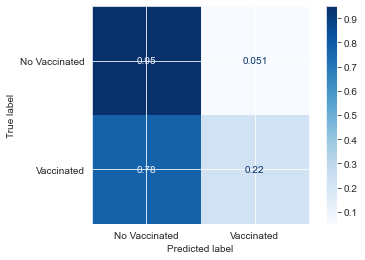

In [250]:
## Check the confusion matrix
plot_confusion_matrix(log_reg, X_test_tf,y_test_seasonal,cmap="Blues",
                     display_labels=['No Vaccinated','Vaccinated'],
                     normalize='true');

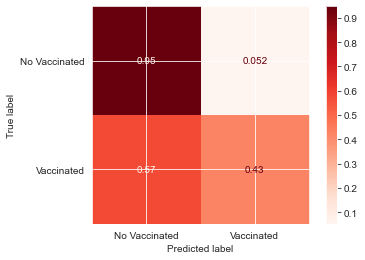

In [251]:
plot_confusion_matrix(log_reg, X_test_tf,y_test_h1n1,cmap="Reds",
                      display_labels=['No Vaccinated','Vaccinated'],
                      normalize='true');

In [256]:
print(classification_report(y_train_h1n1, y_hat_train))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     15774
           1       0.69      0.43      0.53      4256

    accuracy                           0.84     20030
   macro avg       0.78      0.69      0.72     20030
weighted avg       0.83      0.84      0.82     20030



In [257]:
print(classification_report(y_train_seasonal, y_hat_train))

              precision    recall  f1-score   support

           0       0.59      0.95      0.72     10704
           1       0.80      0.23      0.36      9326

    accuracy                           0.61     20030
   macro avg       0.69      0.59      0.54     20030
weighted avg       0.68      0.61      0.55     20030



In [71]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_test.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (6677, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
3780,0.28,0.80
6856,0.07,0.21
10173,0.26,0.70
7285,0.02,0.69
9874,0.05,0.63


In [73]:
roc_auc_score(y_test, y_preds)

0.8318215859983276

In [76]:
classification_report(y_test, preds['h1n1_vaccine'])

TypeError: list indices must be integers or slices, not str

There are two important data preprocessing steps before jumping to the logistic regression:

Scaling: Transform all features to be on the same scale. This matters when using regularization, which we will discuss in the next section. We will use StandardScaler, also known as Z-score scaling. This scales and shifts features so that they have zero mean and unit variance.
NA Imputation: Logistic regression does not handle NA values. We will use median imputation, which fills missing values with the median from the training data, implemented with SimpleImputer.

## Encoding Categorical Features

In [205]:
X_train, X_test, y_train, y_test = train_test_split(features_df2, labels_df, random_state=42)

In [150]:
le = LabelEncoder()

In [151]:
le.fit(X_train['sex'])

LabelEncoder()

In [152]:
X_train['marital_status'] = X_train['marital_status'].fillna('Missing')

In [153]:
le.fit(X_train['marital_status'])

LabelEncoder()

In [155]:
X_train['sex'] = le.fit_transform(X_train['sex'])

In [156]:
X_train['marital_status'] = le.fit_transform(X_train['marital_status'])

In [165]:
X_train['income_poverty'] = X_train['income_poverty'].fillna('Missing')

In [166]:
X_train['education'] = X_train['education'].fillna('Missing')

In [163]:
X_train['age_group'] = le.fit_transform(X_train['age_group'])

In [167]:
X_train['education'] = le.fit_transform(X_train['education'])

In [168]:
X_train['income_poverty'] = le.fit_transform(X_train['income_poverty'])

In [170]:
cat_cols

['race',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'employment_industry',
 'employment_occupation']

In [178]:
X_train['employment_occupation'].isna().sum()

10074

In [173]:
X_train['employment_status'] = X_train['employment_status'].fillna('Missing')

In [177]:
X_train['employment_industry'] = X_train['employment_industry'].fillna('Missing')

In [179]:
X_train['employment_occupation'] = X_train['employment_occupation'].fillna('Missing')

In [184]:
X_train['race'] = le.fit_transform(X_train['race'])

In [184]:
X_train['race'] = le.fit_transform(X_train['race'])

In [186]:
X_train['employment_status'] = le.fit_transform(X_train['employment_status'])

In [187]:
X_train['hhs_geo_region'] = le.fit_transform(X_train['hhs_geo_region'])

In [188]:
X_train['census_msa'] = le.fit_transform(X_train['census_msa'])

In [189]:
X_train['employment_industry'] = le.fit_transform(X_train['employment_industry'])

In [190]:
X_train['employment_occupation'] = le.fit_transform(X_train['employment_occupation'])

In [204]:
features_df2.isna().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [107]:
from collections import defaultdict

In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    features_df, 
    labels_df,
    test_size = .3,
    random_state=42)

X_train.shape, X_test.shape

((18694, 35), (8013, 35))

In [206]:
d = defaultdict(LabelEncoder)

In [207]:
# Encoding the variable
train_transformed = X_train.apply(lambda x: d[x.name].fit_transform(x))

#  Using the dictionary to encode future data
test_transformed = X_test.apply(lambda x: d[x.name].transform(x))

In [210]:
train_transformed

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25194,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,4,1,1,3,1,1,0,0,3,0,3,1,0,1,8,2,2,2,0,0
14006,3,1,0,2,0,2,0,0,0,0,2,2,2,0,2,2,1,0,3,5,4,2,3,3,0,3,0,2,0,6,0,3,2,5,12
11285,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,0,0,3,1,0,2,2,3,0,0,1,0,0,4,1,0,2,18,8
2900,1,1,0,0,0,0,0,0,0,0,0,2,0,0,2,4,0,0,3,4,1,3,2,3,1,2,1,0,0,7,0,0,0,8,17
19083,3,1,2,2,0,2,2,2,2,2,2,1,1,1,1,5,0,1,0,1,4,0,4,3,0,3,2,2,3,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,3,1,0,0,0,2,0,0,2,0,0,0,0,0,2,4,1,1,3,1,0,3,3,3,1,1,1,0,1,9,1,0,0,0,0
5390,1,1,0,0,0,2,0,0,2,1,1,0,0,0,1,4,1,0,3,1,4,3,3,3,1,0,1,0,2,7,1,0,0,0,0
860,3,1,0,2,0,0,0,0,2,0,0,0,0,0,1,4,1,1,3,1,1,3,0,3,0,0,0,0,0,9,2,2,0,2,21


In [42]:
cat_cols = ['race','employment_status','hhs_geo_region', 'census_msa',
            'employment_industry','employment_occupation']

In [53]:
ohe_df = ohe.fit_transform(features_df[cat_cols]).toarray

ValueError: Input contains NaN

In [38]:
binary_cols = ['sex','marital_status']

In [37]:
ord_cols = ['age_group','education','income_poverty']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df,
    test_size=0.25, random_state=42)

### NA Imputation

Logistic regression does not handle NA values. We will use *median* imputation, which fills missing values with the median from the training data, implemented with SimpleImputer.

## Pipeline

In [44]:
numeric_preprocessing = Pipeline([('ss', StandardScaler()),
                                  ('si', SimpleImputer(strategy='median'))])

In [45]:
preprocessor = ColumnTransformer(transformers = [
    ("numeric", numeric_preprocessing, numeric_cols)])

In [ ]:
ohe_df1 = features_df.

## Estimator

In [46]:
# Ridge(L2) Regularization
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(penalty="l2", C=1)
)

In [ ]:
LogisticRegression()

### Hyperparameter Tuning

In [47]:
# GridsearchCV

## Initial Model

I'll start by creating initial vanilla models using both the SMOTEd data, and original unbalanced data with the class_weight='balanced' parameter.

### Evaluating Classification Models

In [78]:
def clf_eval(clf, X_test, y_test, X_train, y_train, scores='F1'):
    """Display performance metrics and plots visualizations to evaluate 
    classification model performance.
    
    ***
    Args
    
    clf: classification model to be evaluated
    
    X_test: dataframe of test predictors
    
    y_test: dataframe of true target values
    
    X_train: dataframe of training predictors; used to compare testing data
    against training data performance
    
    y_train: dataframe of training targets; used to compare testing data
    against training data performance
    
    scores: string (optional). Default is `F1` to return F1, accuracy, 
    and recall scores. 
    """
    line_break = '*'*20
    
    # Save model predictions
    test_preds = clf.predict(X_test)
    train_preds = clf.predict(X_train)
    
    # print classification report
    print(line_break + ' Training Classification ' + line_break)
    print(metrics.classification_report(y_train, train_preds))
    print()
    print(line_break + ' Test Classification ' + line_break)
    print(metrics.classification_report(y_test, test_preds))
    print()
    
       
    print()
    print(line_break + ' Area Under Receiver Operator Curve ' + line_break)
    # plot graphs
    auc = np.round(metrics.roc_auc_score(y_test, test_preds), 2)
    
    fig, [ax1, ax2, ax3] = plt.subplots(figsize=[10, 3], nrows=1, ncols=3)
    plt.tight_layout(pad=2.5)
    metrics.plot_confusion_matrix(clf, X_test, y_test, normalize='true', 
                              display_labels=labels, cmap='Blues', ax=ax1)
    metrics.plot_roc_curve(clf, X_test, y_test, ax=ax2)
    ax2.legend(loc='best', fontsize='small', labels=[f'AUC: {auc}'])
    
    metrics.plot_precision_recall_curve(clf, X_test, y_test, ax=ax3)
    ax3.legend(loc='best', fontsize='small')
    ax3.legend(loc='best', fontsize='small', labels=[f'AP: {ap}'])
    plt.show();
    
    return None

In [79]:
def evaluate_classification(model,X_train, y_train, X_test, y_test,
                            metric = 'accuracy', verbose = True, train_clf_rpt = False,
                            cmap='Blues',normalize='true',figsize=(10,4), labels=None):                 
    """
    Adapted from:
    https://github.com/jirvingphd/Online-DS-FT-022221-Cohort-Notes/blob/master/Phase_3/topic_25_logistic_regression/topic_25_pt2_LogisticRegression_titanic-v2-SG.ipynb
    
    Args:
        model (model): Trained classification model
        X_train (Dataframe): X-train data
        y_train (Dataframe): y-train data
        X_test (Dataframe): X-test data
        y_test (Dataframe): y-test data
        metric (string): Text string to specify preferred performance metric
        verbose (bool, optional): 0, 1, 2. Defaults to True.
        labels (string, optional): Classes for predictions. Defaults to None.
        cmap (str, optional): Color pallette for confusion matrix. Defaults to 'Blues'.
        normalize (str, optional): Option for normalizing confusion matrix. Defaults to 'true'.
        figsize (tuple, optional): Sizing for ROC-AUC plot. Defaults to (10,4).
    Returns:
        [type]: [description]
    """                    

    print('\n|' + '----'*8 + ' Classification Metrics ' + '---'*11 + '--|\n')

    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    prob_train = model.predict_proba(X_train)
    prob_test = model.predict_proba(X_test)  

    ### --- Scores --- ###

    train_score = cf_rpt_results(y_train, y_hat_train, metric)
    test_score = cf_rpt_results(y_test, y_hat_test, metric)

    print(f'Training {metric} score: {train_score}')
    print(f'Testing {metric} score: {test_score}')



    ### --- Clasification Reports --- ###
    
    print('\n\n|' + '----'*7 + ' Classification Report - Testing Data ' + '---'*8 + '-|\n')
    print(metrics.classification_report(y_test, y_hat_test,
                                    target_names=labels))

    fig, ax = plt.subplots(ncols=2, figsize = figsize)
    metrics.plot_confusion_matrix(model, X_test,y_test,cmap=cmap,
                            normalize=normalize, display_labels=labels,
                            ax=ax[0])

    curve = metrics.plot_roc_curve(model, X_test,y_test,ax=ax[1])
    curve.ax_.grid()
    curve.ax_.plot([0,1],[0,1], ls=':')
    plt.tight_layout()
    plt.show()
    plt.close()

    if train_clf_rpt == True:
        print('\n|' + '----'*7 + ' Classification Report - Training Data ' + '---'*8 + '|\n')
        print(metrics.classification_report(y_train, y_hat_train,
                                    target_names=labels))

        fig, ax = plt.subplots(ncols=2, figsize = figsize)
        metrics.plot_confusion_matrix(model, X_train,y_train,cmap=cmap,
                                normalize=normalize, display_labels=labels,
                                ax=ax[0])

        curve = metrics.plot_roc_curve(model, X_train,y_train,ax=ax[1])
        curve.ax_.grid()
        curve.ax_.plot([0,1],[0,1], ls=':')
        plt.tight_layout()
        plt.show()
        plt.close()

    return None


## Logistic Regression

In [42]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
# This competition wants probabilities, not labels
preds = full_pipeline.predict_proba(X_test)
preds

NameError: name 'full_pipeline' is not defined

## Random Forest 

## Hyperparameter Tuning With GridSearch 

### LogReg

In [ ]:
# Logistic regression, optimized for f1_macro
logreg = LogisticRegression(max_iter=600, class_weight='balanced')

param_grid = {
    'C':[0.01, 1, 100, 1e6],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga', 'lbfgs']
}

logreg_gs = GridSearchCV(lr, param_grid, scoring='f1_macro', n_jobs=-1,  verbose=True)

if rerun_gridsearch:
    logreg_gs.fit(X_train_df, y_train)

    print(logreg_gs.best_estimator_)
    print(logreg_gs.best_score_)

In [ ]:
# Logistic regression, optimized for recall_macro
logreg = LogisticRegression(max_iter=600, class_weight='balanced')

param_grid = {
    'C':[0.01, 1, 100, 1e6],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga', 'lbfgs']
}

logreg_gs = GridSearchCV(lr, param_grid, scoring='recall_macro', n_jobs=-1,  
                     verbose=True)

if rerun_gridsearch:
    logreg_gs.fit(X_train_df, y_train)

    print(logreg_gs.best_estimator_)
    print(logreg_gs.best_score_)

In [ ]:
# Check out results on test for recall optizmiation
lr = LogisticRegression(C=1, class_weight='balanced', max_iter=600, 
                        penalty='l1', solver='liblinear')
lr.fit(X_train_df[v1_cols], y_train)

dstools.eval_clf_model(lr, X_test_df[v1_cols], y_test, X_train_df[v1_cols], 
               y_train, labels=labels)

In [ ]:

# Check out results on test for F1 optizmiation
lr = LogisticRegression(C=1, class_weight='balanced', max_iter=600, 
                        penalty='l2', solver='saga')
lr.fit(X_train_df[v1_cols], y_train)

dstools.eval_clf_model(lr, X_test_df[v1_cols], y_test, X_train_df[v1_cols], 
               y_train, labels=labels)

### RandomForest

In [ ]:
# Random Forest, optimized for f1_macro
rf = RandomForestClassifier(class_weight='balanced')

param_grid = {
    'criterion':['gini', 'entropy'],
    'max_depth': [5, 10, 30],
    'min_samples_split': [1, 5, 20],
    'min_impurity_decrease': [0, 0.01, 0.02],
    'max_features': [10, 20],
    'max_leaf_nodes': [6000, 2000, 500]
}

gs_rf = GridSearchCV(rf, param_grid, scoring='f1_macro', n_jobs=-1,  
                     verbose=True)

if rerun_gridsearch:
    gs_rf.fit(X_train_df[v1_cols], y_train)

    print(gs_rf.best_estimator_)
    print(gs_rf.best_score_)

In [ ]:
# Review model performance for a model with these optimal params
rf = RandomForestClassifier(class_weight='balanced', criterion='entropy', 
                            max_depth=30, max_features=10, 
                            max_leaf_nodes=2000, min_samples_split=20)


rf.fit(X_train_df[v1_cols], y_train)

dstools.eval_clf_model(rf, X_test_df[v1_cols], y_test, X_train_df[v1_cols], 
               y_train, labels=labels)

In [ ]:
# Review model performance for a model with optimal params that weren't the
# max in the grid search.
rf = RandomForestClassifier(class_weight='balanced', criterion='entropy', 
                            max_features=10)


rf.fit(X_train_df[v1_cols], y_train)

dstools.eval_clf_model(rf, X_test_df[v1_cols], y_test, X_train_df[v1_cols], 
               y_train, labels=labels)

In [ ]:
# How about trying another grid search with just max_depth and criterion?
rf = RandomForestClassifier(class_weight='balanced')

param_grid = {
    'criterion':['gini', 'entropy'],
    'max_depth': [5, 10, 30]
}

gs_rf = GridSearchCV(rf, param_grid, scoring='f1_macro', n_jobs=-1,  
                     verbose=True)

if rerun_gridsearch:
    gs_rf.fit(X_train_df[v1_cols], y_train)

    print(gs_rf.best_estimator_)
    print(gs_rf.best_score_)

In [ ]:
https://scikit-learn.org/stable/modules/feature_selection.html)

## XGBoost

# iNTERPRET

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
    
plot_confusion_matrix(model, X_train, y_train, ax=ax[0])
plot_confusion_matrix(model, X_test, y_test, ax=ax[1])
ax[0].grid(False)
ax[1].grid(False)

# CONCLUSIONS & RECOMMENDATIONS

# TO DO/FUTURE WORK

- 